In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline

In [2]:
df_Texas_Covid_case = pd.read_excel("../Texas COVID-19 Case Count Data by County.xlsx",header=2)

In [3]:
a = df_Texas_Covid_case.set_index('County Name')

In [4]:
b = a.T.Harris[a.columns[1:]]

In [5]:
dated_dict = {}
count = 0
for x in b:
    month_temp = int(b.index[count][-5:].split('-')[0])
    day_temp = int(b.index[count][-5:].split('-')[1])
    dated_dict[datetime.datetime(2020, month_temp, day_temp)] = b[count]
    count += 1

In [6]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Total Cases'])

In [7]:
c = dated_df.set_index('Date')

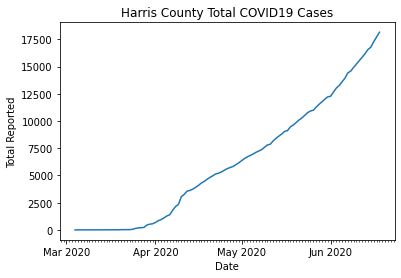

In [8]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Total Reported',color='black')
plt.plot(c)
plt.title('Harris County Total COVID19 Cases')
plt.savefig('HarrisTotal.png')

In [9]:
c_5day_moving= c.rolling(5).mean().shift()

In [10]:
c

,Total Cases
Date,
2020-03-04,0.0
2020-03-05,0.0
2020-03-06,4.0
2020-03-09,5.0
2020-03-10,5.0
...,...
2020-06-14,16568.0
2020-06-15,16778.0
2020-06-16,17282.0


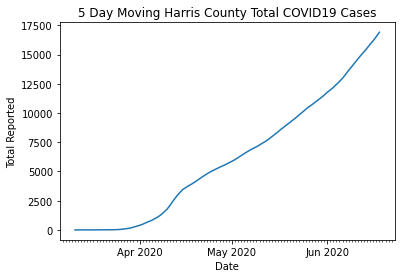

In [11]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Total Reported',color='black')
plt.plot(c_5day_moving)
plt.title('5 Day Moving Harris County Total COVID19 Cases')
plt.savefig('HarrisTotalMoving.png')

In [12]:
x = c.diff(periods = 1)

In [13]:
print(x[-5:].to_markdown())

| Date                |   Total Cases |
|:--------------------|--------------:|
| 2020-06-14 00:00:00 |           380 |
| 2020-06-15 00:00:00 |           210 |
| 2020-06-16 00:00:00 |           504 |
| 2020-06-17 00:00:00 |           425 |
| 2020-06-18 00:00:00 |           450 |


In [14]:
x.rename(columns={'Total Cases':'New Cases'}, inplace=True)

In [15]:
print(x[-5:].to_markdown())

| Date                |   New Cases |
|:--------------------|------------:|
| 2020-06-14 00:00:00 |         380 |
| 2020-06-15 00:00:00 |         210 |
| 2020-06-16 00:00:00 |         504 |
| 2020-06-17 00:00:00 |         425 |
| 2020-06-18 00:00:00 |         450 |


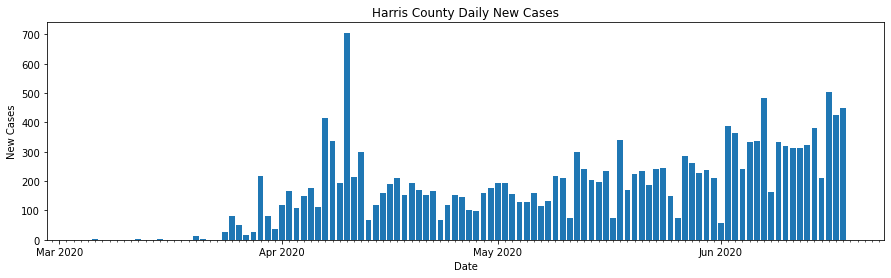

In [16]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,4)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('New Cases',color='black')
plt.title('Harris County Daily New Cases')
plt.bar(x.index,x['New Cases'])
fig.savefig('HarrisNewCasesDaily.png')

Text(0.5, 1.0, '5 Day Moving Harris County Total COVID19 Cases')

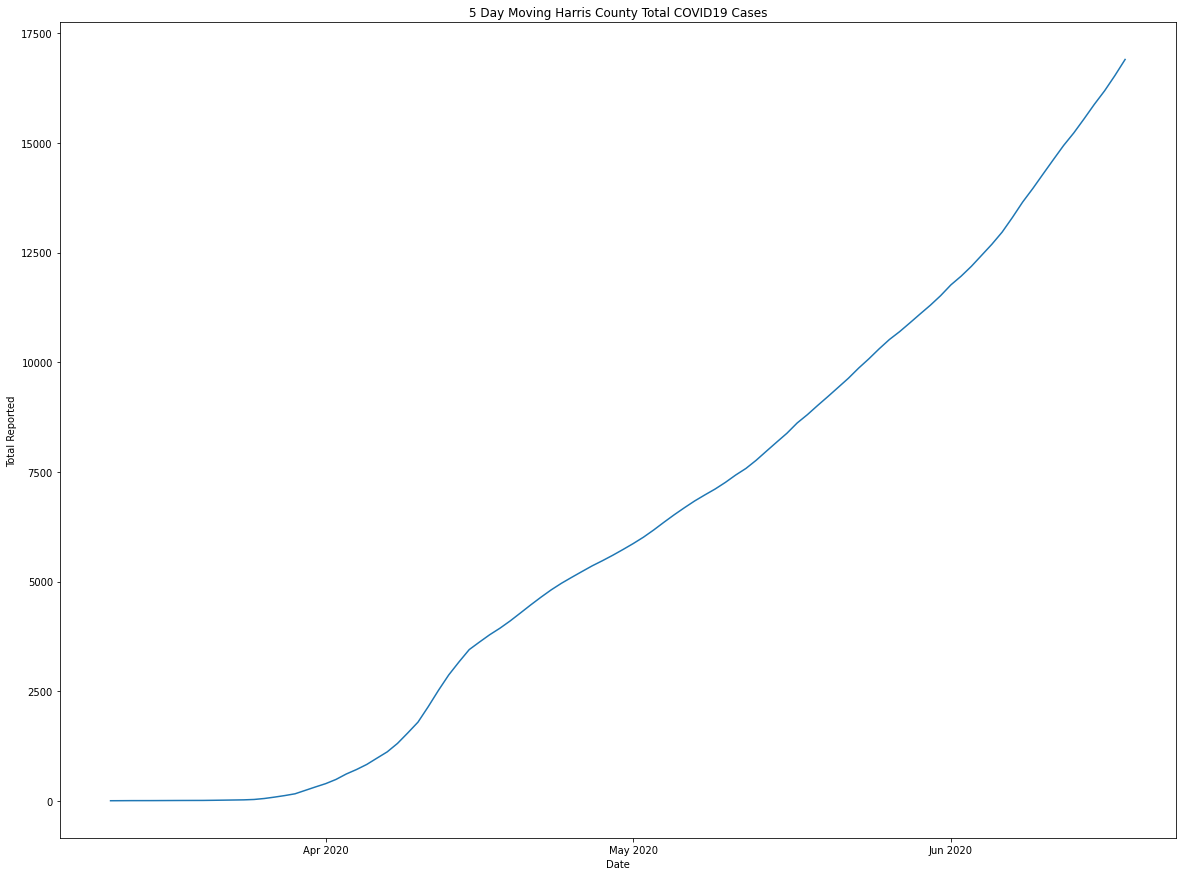

In [17]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(20,15)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(days)
#plt.subplot(211)
plt.xlabel('Date',color='black')
plt.ylabel('Total Reported',color='black')
plt.plot(c_5day_moving)
plt.title('5 Day Moving Harris County Total COVID19 Cases')